In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("thyroid.csv", sep=";", na_values=["?"])
df.columns = df.columns.str.strip()

# Remove garbage columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

X = df.drop("Outlier_label", axis=1)
y = df["Outlier_label"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_scaled

array([[-2.34449113e-02,  1.50050924e+00, -3.94405319e-01, ...,
        -1.40951598e+00, -3.74590514e-02, -1.25859776e+00],
       [ 2.40791602e-03, -6.66440415e-01, -3.94405319e-01, ...,
        -6.57814578e-01,  2.27969782e-01, -5.68029663e-01],
       [-7.03031607e-02, -6.66440415e-01,  2.53546276e+00, ...,
        -7.17159426e-01,  4.34414431e-01, -7.13412420e-01],
       ...,
       [-2.99081181e-02, -6.66440415e-01, -3.94405319e-01, ...,
         6.08208844e-01,  7.58827450e-01,  2.49748343e-01],
       [ 7.25532113e-03,  1.50050924e+00, -3.94405319e-01, ...,
         2.32358141e-01, -7.96695877e-03,  4.67822478e-01],
       [-2.18291096e-02, -6.66440415e-01, -3.94405319e-01, ...,
        -2.48028670e-02,  8.05093192e-02,  1.22538431e-01]])

In [4]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators = 200,
    random_state = 42,
    contamination="auto"
)

In [5]:
labels = clf.fit_predict(X_scaled)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PC2')

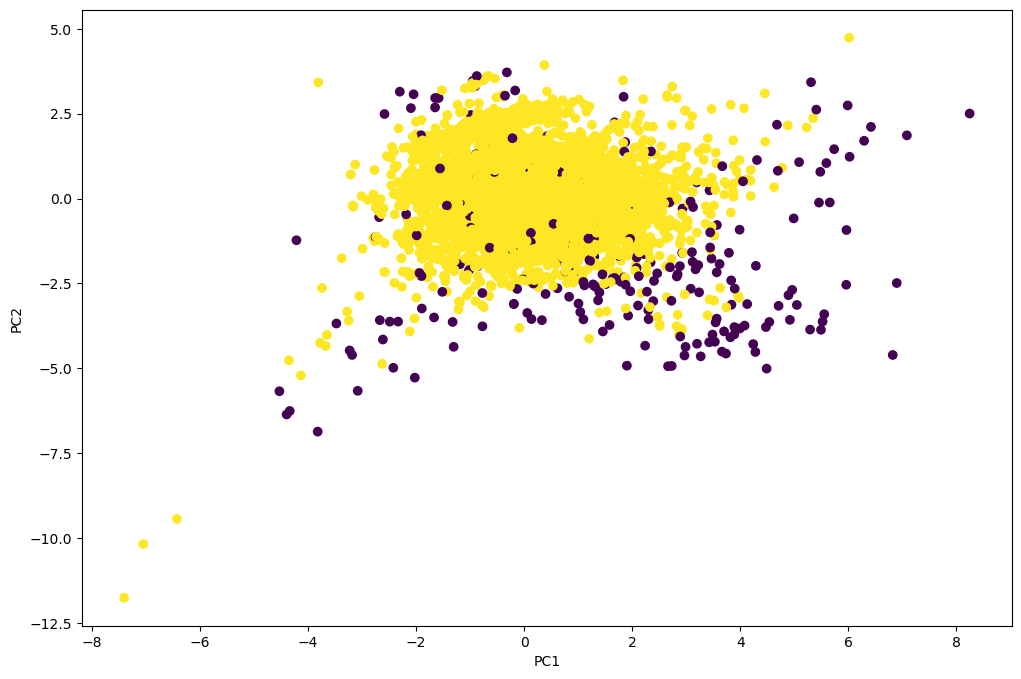

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [10]:
import numpy as np

outliers = np.sum(labels==-1)
outliers

np.int64(883)

# LOF

In [12]:
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor()

labels =lof.fit_predict(X_scaled)

Text(0, 0.5, 'PC2')

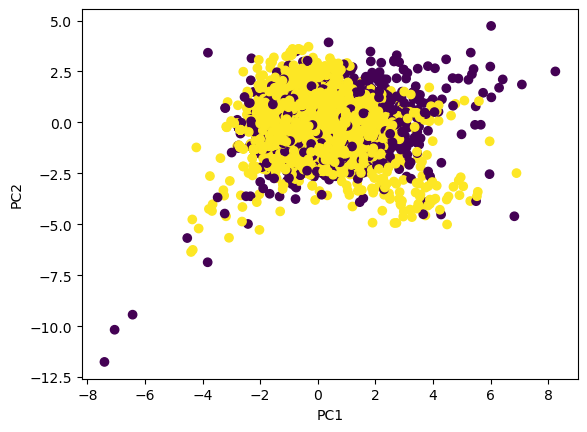

In [13]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")